Fitting a logarithmic function to a fex data point.

(original use case: calculate the number of components in a Gaussian Mixture Model. Kemaro Project)



In [76]:
import matplotlib.pyplot as plt
%matplotlib inline

import math
import numpy as np


In [77]:
# model
f_x_abc = lambda x, a,b,c: (a + b* math.log(x+c))

# error (not squared!) and gradients of sqErr
err_i = lambda x, y, a,b,c: (y - f_x_abc(x, a,b,c) )
de_da = lambda x, y, a,b,c: -2.0*err_i(x, y, a,b,c)
de_db = lambda x, y, a,b,c: -2.0*err_i(x, y, a,b,c) *math.log(x+c)
de_dc = lambda x, y, a,b,c: -2.0*err_i(x, y, a,b,c) * b / (x+c)

In [78]:
# data:
X = [0.1, 2,   4,    5,    8,     10,   20,  40,  80]
Y = [0.6, 1.4, 2.0,  2.2,  2.6,  2.9,   4,   6,  8.]
N = len(X)
N

9

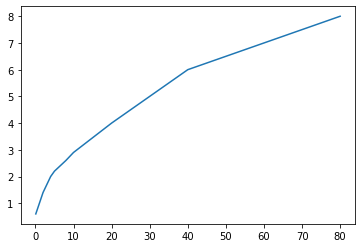

In [79]:
plt.plot(X, Y)

In [80]:
a = -1.
b = 1.0
c = 2.0

for i in range(N):
    xi = X[i]
    yi = Y[i]
    e = err_i(xi, yi, a, b, c)
    print(e)

0.8580626552706226
1.0137056388801093
1.208240530771945
1.254089850944687
1.2974149070059542
1.4150933502119996
1.908957546641684
3.2623303817166316
4.593280752735747


In [81]:
## init params:
a = - 1.0
b = 1.0
c = 1.0
alpha = 0.005
errMax = 1e-3

for k in range(200000):
    grad_a = 0.
    grad_b = 0.
    grad_c = 0.
    err_sq_batch = 0.
    for i in range(N):
        xi = X[i]
        yi = Y[i]
        err_sq_batch += err_i(xi, yi, a, b, c)**2
        grad_a += de_da(xi, yi, a, b, c)
        grad_b += de_db(xi, yi, a, b, c)
        grad_c += de_dc(xi, yi, a, b, c)
        
    a -= alpha * grad_a
    b -= alpha * grad_b
    c -= alpha * grad_c
    if k%20000 == 0:
        print("")
        print("a = " + str(a))
        print("b = " + str(b))
        print("c = " + str(c))
        print("grad_a = " + str(grad_a))
        print("grad_b = " + str(grad_b))
        print("grad_c = " + str(grad_c))
        print("err_sq_batch = "  + str(err_sq_batch))
    if err_sq_batch < errMax:
        print("break. err_batch="+str(err_sq_batch))
        break
print("")
print("a = " + str(a))
print("b = " + str(b))
print("c = " + str(c))




a = -0.8164278335936935
b = 1.5141522820454187
c = 1.0283706723444068
grad_a = -36.7144332812613
grad_b = -102.83045640908375
grad_c = -5.674134468881369
err_sq_batch = 47.934202886212404

a = -6.305303813632685
b = 3.1539005367152027
c = 9.145469578750113
grad_a = 0.012663754423791085
grad_b = -0.002864355619104364
grad_c = -0.02152785443703528
err_sq_batch = 0.221813592524292

a = -7.093013016730367
b = 3.3304874574947014
c = 10.502160626230385
grad_a = 0.004851643612504342
grad_b = -0.0010783764542791063
grad_c = -0.008457774123404854
err_sq_batch = 0.19503648419098155

a = -7.434305666806228
b = 3.406083808692409
c = 11.099954012330901
grad_a = 0.00234714345060838
grad_b = -0.0005181210644786827
grad_c = -0.004130054031101441
err_sq_batch = 0.19003416991932257

a = -7.606866167506036
b = 3.4441118362398355
c = 11.404267285173752
grad_a = 0.0012377184147001064
grad_b = -0.0002723084283794419
grad_c = -0.0021875071764002885
err_sq_batch = 0.18875411796969307

a = -7.699739640049341


grad_a = -0.000260675941098798
grad_b = 5.4384173203483877e-05
grad_c = 0.0005277208081727962
err_batch = 0.000130337970549399
a = -10.668149137770385
b = 3.855185567634275
c = 18.083059816203395

In [82]:
# set manually:
am = round(a, 2)
bm = round(b, 2)
cm = round(c, 2)

# am = -9.2
# bm = 3.6
# cm = 14.6


# am = -10.5
# bm = 3.8
# cm = 17.8

print("am="+str(am))
print("bm="+str(bm))
print("cm="+str(cm))


am=-7.81
bm=3.49
cm=11.77


In [83]:
Y_hat = [f_x_abc(x, a, b, c) for x in X]

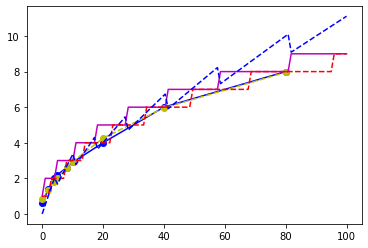

In [84]:
plt.plot(X, Y, '-ob')
plt.plot(X, Y_hat, '--oy')

xx = np.linspace(0., 100, 100)
yy = [math.ceil(y) for y in Y_hat]
yceil = [math.ceil(f_x_abc(x, am, bm, cm)) for x in xx]
yround = [round(f_x_abc(x, am, bm, cm)) for x in xx]
plt.plot(xx, yceil, '-m')
plt.plot(xx, yround, '--r')
plt.plot(xx, np.divide(xx,yceil), '--b')


(0.0, 5.0)

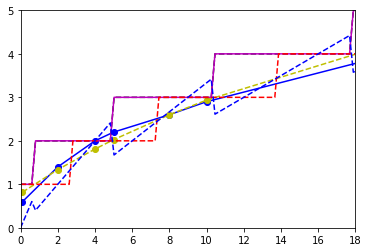

In [85]:
plt.plot(X, Y, '-ob')
plt.plot(X, Y_hat, '--oy')

xx = np.linspace(0, 40, 200)
plt.plot(xx, [math.ceil(f_x_abc(x, a, b, c)) for x in xx], '--k')

yceil = [math.ceil(f_x_abc(x, am, bm, cm)) for x in xx]
yround = [round(f_x_abc(x, am, bm, cm)) for x in xx]
plt.plot(xx, yceil, '-m')
plt.plot(xx, yround, '--r')


m2PerPointMan = np.divide(xx,yceil)
plt.plot(xx, m2PerPointMan, '--b')

# m2PerPointMan = np.divide(xx,yround)
# plt.plot(xx, m2PerPointMan, '--b')


plt.xlim(0, 18)
plt.ylim(0, 5)


In [93]:
math.ceil(f_x_abc(36, am, bm, cm))

6

In [87]:
for i in range(N):
    xi = X[i]
    yi = Y[i]
    e = err_i(xi, yi, am, bm, cm)
    print(e)

-0.22430958808930213
0.05750182853543295
0.18419819059743414
0.16962540033543938
-0.004738073767013962
-0.0410597346101329
-0.26024334450217435
0.03563020011080287
0.03769379056008315
